In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
plt.style.use('ggplot')

In [10]:
df = pd.read_excel('./2215.xlsx')
df.head()

Timestamp (YYYY-MM-DDThh:mm:ss)  Glucose Value (mg/dL)  \
0             2023-06-02T12:54:35                    129   
1             2023-06-02T12:59:35                    153   
2             2023-06-02T13:04:35                    147   
3             2023-06-02T13:09:35                    135   
4             2023-06-02T13:14:35                    131   

                                       Food Consumed  
0  Apple walnut grilled chicken salad, Chicken po...  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4                                                NaN

In [11]:
glucose = df['Glucose Value (mg/dL)'].values
timestamp = df['Timestamp (YYYY-MM-DDThh:mm:ss)'].values
# partitions = np.linspace(0, len(df), 4).astype(np.int32)
partitions = [0, 2070]
food_timesteps = df['Food Consumed']
food_timesteps = food_timesteps[~pd.isna(food_timesteps)].index

df1 = df[partitions[0]:partitions[1]]
df.shape

(2213, 3)

In [12]:
dataset = {}

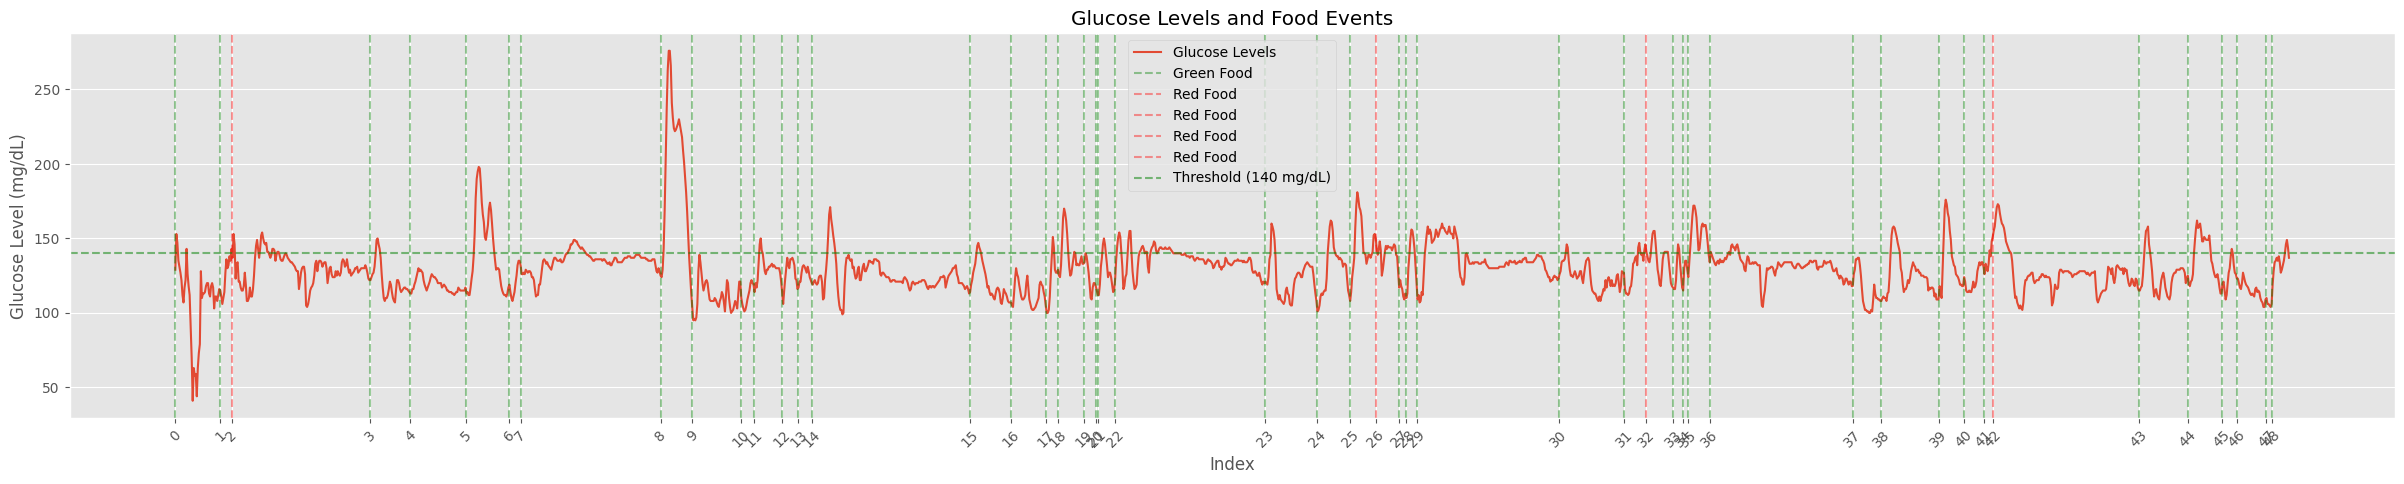

In [13]:
glucose = df1['Glucose Value (mg/dL)'].values
food_consumed = df1['Food Consumed'].fillna(0).values
food_timesteps1 = df1['Food Consumed']
food_timesteps1 = food_timesteps1[~pd.isna(food_timesteps1)].index

# Create dictionaries for red and green foods
red_foods = {}
green_foods = {}

# Classify foods based on glucose levels
for i, timestep in enumerate(food_timesteps1):
    if glucose[timestep] > 140:
        red_foods[i] = food_consumed[timestep]
    else:
        green_foods[i] = food_consumed[timestep]

# Plot the glucose levels with meal markers
plt.figure(figsize=(30, 5))
plt.plot(glucose, label="Glucose Levels")
for i in food_timesteps1:
    plt.axvline(i, color='r' if glucose[i] > 140 else 'g', linestyle='--', alpha=0.4,
                label="Red Food" if glucose[i] > 140 else "Green Food" if i == food_timesteps1[0] else "")
plt.axhline(140, color='g', linestyle='--', alpha=0.5, label="Threshold (140 mg/dL)")
plt.xticks(food_timesteps1, np.arange(len(food_timesteps1)), rotation=45)
plt.legend()
plt.title("Glucose Levels and Food Events")
plt.xlabel("Index")
plt.ylabel("Glucose Level (mg/dL)")
plt.show()

# Print red and green foods
print("Red Foods (Glucose > 140):")
for idx, food in red_foods.items():
    print(f"{idx} : {food}")

print("\nGreen Foods (Glucose <= 140):")
for idx, food in green_foods.items():
    print(f"{idx} : {food}")


In [14]:
food_timesteps1_new = np.insert(food_timesteps1, len(food_timesteps1), len(glucose) - 1)
food_timesteps1_diff = np.diff(food_timesteps1_new)
scores1 = []
for i in range(0, len(food_timesteps1_diff)):
    scores1.append(np.mean(np.abs(glucose[food_timesteps1_new[i]:food_timesteps1_new[i+1]] - 140)))

for i, timestep in enumerate(food_timesteps1):
    if food_consumed[timestep] not in dataset.keys():
        dataset[food_consumed[timestep]] = [scores1[i]]
    else:
        dataset[food_consumed[timestep]].append(scores1[i])

Red Foods (Glucose > 140):
2 : Green Grapes and pear
26 : Pear
32 : Chicken wrap with shredded cheese, Tostito chips
42 : Yasso frozen yogurt bar

Green Foods (Glucose <= 140):
0 : Apple walnut grilled chicken salad, Chicken pot pie soup
1 : Chicken tacos
Rice and beans
Tortilla cheese with nacho cheese
Water

3 : Scrambled eggs, Toast with almond butter, coffee with milk and vanilla creamer
4 : Banana Protein Smoothie
5 : Pizza Mandarin Ginger Ale
6 : Banana, Pear, water
7 : Salmon with jasminerice, water
8 : Limeondex, glucose tolerance test beverage.
9 : Scrambled eggs, coffee with milk and hazel nutcream, toast with almond butter.
10 : Orange
11 : Chicken breast with corn on the cob and couscous water
12 : Yasso frozen yogurt bar
13 : Pear
14 : Chicken with rice and beans, tortilla chips with nacho cheese dip
15 : Scrambled eggs, coffee with milk and hazel nutcream, toast with almond butter.
16 : Protein bar
17 : Grilled chicken salad with zesty apple cider vinaigrette water
18 : W

In [15]:
dataset_final = {}

for k, v in dataset.items():
    score = np.mean(v)
    if score != 0:
        dataset_final[k] = np.mean(v)

dataset_final

{'Apple walnut grilled chicken salad, Chicken pot pie soup': 33.79545454545455,
 'Chicken tacos\nRice and beans\nTortilla cheese with nacho cheese\nWater\n': 16.90909090909091,
 'Green Grapes and pear': 11.455882352941176,
 'Scrambled eggs, Toast with almond butter, coffee with milk and vanilla creamer': 20.487179487179485,
 'Banana Protein Smoothie': 18.428125,
 'Pizza Mandarin Ginger Ale': 24.095238095238095,
 'Banana, Pear, water': 19.727272727272727,
 'Salmon with jasminerice, water': 6.518248175182482,
 'Limeondex, glucose tolerance test beverage.': 64.87096774193549,
 'Scrambled eggs, coffee with milk and hazel nutcream, toast with almond butter.': 24.670833333333334,
 'Orange': 29.583333333333332,
 'Chicken breast with corn on the cob and couscous water': 11.321428571428571,
 'Yasso frozen yogurt bar': 15.507215007215008,
 'Pear': 9.406354515050168,
 'Chicken with rice and beans, tortilla chips with nacho cheese dip': 16.793548387096774,
 'Protein bar': 27.235294117647058,
 'Gri

In [16]:
X, y = [], []

def clean(text):
    import re
    return re.sub(r'[^\w\s]', '', text).strip().lower()

for k, v in dataset_final.items():
    # food = " ".join([clean(food).strip() for food in k.split(',')])
    # X.append([f for f in food.split(' ')])
    X.append(' '.join(clean(k).split()))
    y.append(v)

X

['apple walnut grilled chicken salad chicken pot pie soup',
 'chicken tacos rice and beans tortilla cheese with nacho cheese water',
 'green grapes and pear',
 'scrambled eggs toast with almond butter coffee with milk and vanilla creamer',
 'banana protein smoothie',
 'pizza mandarin ginger ale',
 'banana pear water',
 'salmon with jasminerice water',
 'limeondex glucose tolerance test beverage',
 'scrambled eggs coffee with milk and hazel nutcream toast with almond butter',
 'orange',
 'chicken breast with corn on the cob and couscous water',
 'yasso frozen yogurt bar',
 'pear',
 'chicken with rice and beans tortilla chips with nacho cheese dip',
 'protein bar',
 'grilled chicken salad with zesty apple cider vinaigrette water',
 'white chocolate mocha',
 'pear water',
 'pasta with toast and sliced cheese fresh strawberrieswater',
 'yasso chocolate chip cookie dough frozen yogurt bar',
 'sugar cookies',
 'omlet with cheese coffee with milk and hazel nut cream toast with almond butter',

In [17]:
# TF-IDF on the X: used to convert text data into numerical data based on term frequencey and inverse document frequency
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X).toarray()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


y_scaled = StandardScaler().fit_transform(np.array(y).reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_scaled, test_size=0.2, random_state=42)

random_forest = RandomForestRegressor(n_estimators=50, random_state=42)
gboosting = GradientBoostingRegressor(n_estimators=50, random_state=42)
linear_reg = LinearRegression()
svr = SVR(kernel='poly', degree=3)

models = {
    'Random Forest': random_forest,
    'Support Vector Regression': svr,
    'Linear Regression': linear_reg
}

for model in models:
    models[model].fit(X_train, y_train)
    pred = models[model].predict(X_test)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print(f"{model} : mse={mse:.3f}, r2={r2:.2f}")

Random Forest : mse=3.286, r2=-0.27
Support Vector Regression : mse=2.758, r2=-0.07
Linear Regression : mse=2.884, r2=-0.12
